**Project:** Business Analyst Assignment - TravClan Hotel Bookings

**Author:** Hemang Krish

**Date:** February 2nd, 2026

**Objective:** Analyze 30K hotel bookings across multiple dimensions to identify revenue leakage, cancellation patterns, and profitability opportunities, delivering 4 prioritized business recommendations with quantified ROI.

---

### Assignment Context
This comprehensive analysis addresses three core business challenges:

**1. Key Observations (Task 1)**
- Identify 3+ meaningful trends/patterns
- Analyze booking patterns by channel/room type/star rating  
- Characterize cancellation behavior

**2. Root Cause Analysis (Task 2)**
- Uncover reasons behind observed cancellation patterns
- Explain channel/property performance differences
- Quantify seasonal/temporal influences on bookings

**3. Business Recommendations (Task 3)**
- Suggest actionable strategies to reduce cancellations
- Profitability improvement roadmap
- Channel/pricing/promotion optimization

---

**Outcome:**  
Data-driven insights and business recommendations to reduce cancellations and improve
revenue efficiency.

##Load Dataset

## Data Loading and Initial Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/TravClan_Assignment/Hotels Booking Data (1).csv")


In [2]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,Yes,369.65,Web,Confirmed,2024-03-04,5.37,0.0,No,2.0,True
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,Yes,492.51,Web,Confirmed,2024-07-19,7.16,0.0,No,7.0,True
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,Yes,0.00,iOS,Confirmed,2024-03-22,0.00,0.0,No,5.0,True
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,Yes,545.54,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6.0,False
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.0,No,NaN,False


In [3]:
df.shape

(30000, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  float64
 14  selling_price       30000 non-null  float64
 15  payment_method      30000 non-null  object 
 16  refu

In [5]:
df.isnull().sum()

,0
customer_id,0
property_id,0
city,0
star_rating,0
booking_date,0
check_in_date,5468
check_out_date,5468
room_type,0
num_rooms_booked,0
stay_type,0


### Missing Values Explanation

Missing values in `check_in_date`, `check_out_date`, and `length_of_stay` primarily occur for **cancelled or failed bookings**, where no actual stay takes place.  
These null values are expected and reflect real booking outcomes rather than data quality issues.


In [6]:
df['booking_status'].value_counts()


,count
booking_status,
Confirmed,21963
Cancelled,5779
Failed,2258


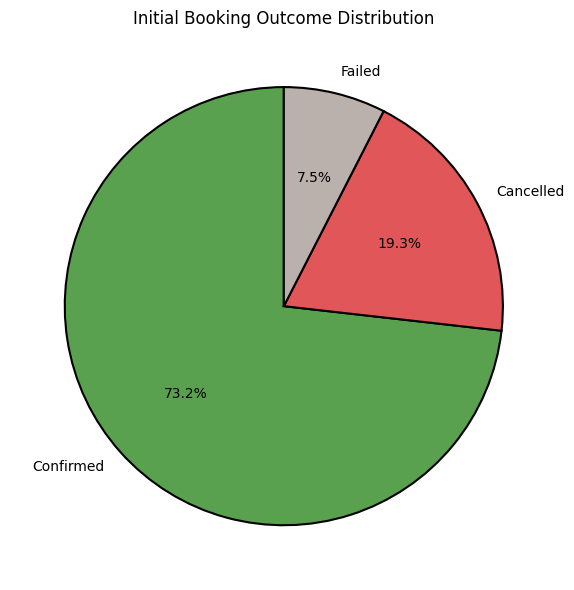

In [7]:
# Booking outcome distribution
booking_outcomes = (
    df['booking_status']
    .value_counts()
)

plt.figure(figsize=(6,6))

plt.pie(
    booking_outcomes.values,
    labels=booking_outcomes.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#59A14F', '#E15759', '#BAB0AC'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Initial Booking Outcome Distribution')
plt.tight_layout()
plt.show()


### Cancellation Flag

Failed bookings are removed, and a binary cancellation indicator is derived from booking status.


In [8]:
df_analysis = df.copy()

# Remove failed bookings from dataframe copy
df_analysis = df_analysis[df_analysis['booking_status'] != 'Failed']

# Creating a binary flag for cancelled bookings in df_analysis
df_analysis['is_cancelled'] = (df_analysis['booking_status'] == 'Cancelled').astype(int)

In [9]:
# Creating a binary flag for cancelled bookings in the original  (df)
df['is_cancelled'] = df['booking_status'].apply(
    lambda x: 1 if x == 'Cancelled' else 0
)

In [10]:
# Creating a binary flag for failed bookings in the original  (df)
df['is_failed'] = df['booking_status'].apply(
    lambda x: 1 if x == 'Failed' else 0
)

In [11]:
# Re-filtered the original dataframe to create df_analysis, excluding 'Failed' bookings this time
df_analysis = df[df['booking_status'] != 'Failed']
df_analysis

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin,is_cancelled,is_failed
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,Web,Confirmed,2024-03-04,5.37,0.00,No,2.0,True,0,0
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,Web,Confirmed,2024-07-19,7.16,0.00,No,7.0,True,0,0
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,iOS,Confirmed,2024-03-22,0.00,0.00,No,5.0,True,0,0
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,Android,Confirmed,2024-11-24,7.93,24.50,Yes,6.0,False,0,0
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,Web,Cancelled,2024-03-02,0.00,0.00,No,NaN,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,91,5,Boston,4,2025-04-29,2025-05-23,2025-05-24,Standard,1,Business,...,Web,Confirmed,2024-10-05,0.00,0.00,No,1.0,True,0,0
29996,432,5,Los Angeles,4,2025-04-29,2025-06-24,2025-06-25,Deluxe,1,Leisure,...,iOS,Confirmed,2024-10-22,0.00,0.00,No,1.0,False,0,0
29997,15,5,Boston,5,2025-04-29,2025-06-17,2025-06-20,Standard,1,Leisure,...,iOS,Confirmed,2024-10-22,0.00,2.58,Yes,3.0,False,0,0
29998,73,1,San Francisco,3,2025-04-29,NaN,NaN,Standard,1,Business,...,Android,Cancelled,2024-10-15,6.81,0.00,No,NaN,False,1,0


In [12]:
# Assigning zero stay length to cancelled bookings to reflect non-realized stays

df_analysis.loc[df_analysis['is_cancelled'] == 1, 'length_of_stay'] = 0

In [13]:
# Here we will display the count of each booking status in the df_analysis dataframe
df_analysis['booking_status'].value_counts()

,count
booking_status,
Confirmed,21963
Cancelled,5779


In [14]:
date_cols = [
    'booking_date',
    'travel_date',
    'check_in_date',
    'check_out_date'
]

# Standardized date fields to enable consistent time-based analysis

for col in date_cols:
    df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')

/tmp/ipython-input-741608608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')
/tmp/ipython-input-741608608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis[col] = pd.to_datetime(df_analysis[col], errors='coerce')
/tmp/ipython-input-741608608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [15]:
df_analysis[date_cols].dtypes


,0
booking_date,datetime64[ns]
travel_date,datetime64[ns]
check_in_date,datetime64[ns]
check_out_date,datetime64[ns]


In [16]:
df_analysis[['booking_date', 'travel_date']].dtypes


,0
booking_date,datetime64[ns]
travel_date,datetime64[ns]


In [17]:
df_analysis['booking_month'] = df_analysis['booking_date'].dt.month


/tmp/ipython-input-51836105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['booking_month'] = df_analysis['booking_date'].dt.month


In [18]:
df_analysis['travel_month'] = df_analysis['travel_date'].dt.month


/tmp/ipython-input-2395129852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['travel_month'] = df_analysis['travel_date'].dt.month


In [19]:
df_analysis[['booking_month', 'travel_month']].head()


,booking_month,travel_month
0,4,3
1,4,7
2,4,3
3,4,11
4,4,3


In [20]:
df_analysis[['booking_month', 'travel_month']].isnull().sum()


,0
booking_month,0
travel_month,0


In [21]:
df_analysis['booking_month_name'] = df_analysis['booking_date'].dt.month_name()
df_analysis['travel_month_name'] = df_analysis['travel_date'].dt.month_name()


/tmp/ipython-input-1065561156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['booking_month_name'] = df_analysis['booking_date'].dt.month_name()
/tmp/ipython-input-1065561156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['travel_month_name'] = df_analysis['travel_date'].dt.month_name()


In [22]:

df_analysis['lead_time'] = (
    df_analysis['check_in_date'] - df_analysis['booking_date']
).dt.days
#Remove negative / invalid lead times
df_analysis = df_analysis[df_analysis['lead_time'] >= 0]


/tmp/ipython-input-2270029240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['lead_time'] = (


## Data Cleaning & Assumptions

- Failed bookings are excluded, as they do not represent customer-driven outcomes.
- Analysis focuses only on Confirmed and Cancelled bookings.
- Invalid or negative lead times are removed to ensure realistic booking behavior.
- Revenue and profit calculations are based only on confirmed bookings.


#METRICS CALCULATIONS

In [23]:
total_bookings = len(df_analysis)
total_bookings


22697

In [24]:
df_analysis = df_analysis.copy()

In [25]:
cancellation_rate = df_analysis['is_cancelled'].mean() * 100
print(f"Cancellation rate after excluding bookings without valid lead time: {cancellation_rate:.2f}%")

Cancellation rate after excluding bookings without valid lead time: 4.70%


In [26]:
avg_stay = df_analysis[df_analysis['is_cancelled'] == 0]['length_of_stay'].mean()
avg_stay
print("The average length of stay is approximately",avg_stay,"nights")


The average length of stay is approximately 4.002357836338419 nights


Confirmed bookings have an average stay length of approximately 4 nights

In [27]:
df_analysis.columns


Index(['customer_id', 'property_id', 'city', 'star_rating', 'booking_date',
       'check_in_date', 'check_out_date', 'room_type', 'num_rooms_booked',
       'stay_type', 'booking_channel', 'booking_value', 'costprice', 'markup',
       'selling_price', 'payment_method', 'refund_status', 'refund_amount',
       'channel_of_booking', 'booking_status', 'travel_date', 'cashback',
       'coupon_redeem', 'Coupon USed?', 'length_of_stay', 'is_weekend_checkin',
       'is_cancelled', 'is_failed', 'booking_month', 'travel_month',
       'booking_month_name', 'travel_month_name', 'lead_time'],
      dtype='object')

In [28]:
avg_booking_value = df_analysis[df_analysis['is_cancelled'] == 0]['selling_price'].mean()
avg_booking_value
print("The average booking value is approximately",avg_booking_value)


The average booking value is approximately 29733.59238603791


In [29]:
total_revenue = df_analysis[df_analysis['is_cancelled'] == 0]['selling_price'].sum()
print("Total realized revenue from confirmed bookings is approximately",total_revenue)


Total realized revenue from confirmed bookings is approximately 643137603.3100001


In [30]:
df_analysis['profit'] = df_analysis['selling_price'] - df_analysis['costprice']

total_profit = df_analysis[df_analysis['is_cancelled'] == 0]['profit'].sum()
total_profit
print("Total profit from confirmed bookings is approximately",total_profit)

Total profit from confirmed bookings is approximately 156175892.31


### Profit Definition

Profit is defined as **selling price minus cost price** to measure realized margin from confirmed bookings.


### Booking Channel Columns

The dataset contains two channel-related fields:
- **booking_channel** – primary channel used for analysis
- **channel_of_booking** – secondary / redundant representation

All channel-level metrics in this analysis are computed using **booking_channel** to ensure consistency.


In [31]:
channel_booking_count = (
    df_analysis
    .groupby('booking_channel')
    .size()
    .reset_index(name='total_bookings')
    .sort_values(by='total_bookings', ascending=False)
)

channel_booking_count


,booking_channel,total_bookings
2,Web,11911
0,Mobile App,8740
1,Travel Agent,2046


**Insights** :Online booking channels contribute the highest booking volume, indicating their importance in customer acquisition.

In [32]:
channel_revenue = (
    df_analysis[df_analysis['is_cancelled'] == 0]
    .groupby('booking_channel')['selling_price']
    .sum()
    .reset_index(name='total_revenue')
    .sort_values(by='total_revenue', ascending=False)
)

channel_revenue


,booking_channel,total_revenue
2,Web,3.482127e+08
0,Mobile App,2.355976e+08
1,Travel Agent,5.932728e+07


**Insight:**  
Web bookings generate the highest realized revenue among all channels, indicating stronger booking intent and better revenue realization. Mobile App bookings contribute substantial revenue but lag behind Web, while Travel Agent bookings contribute the least to total revenue.


In [33]:
channel_cancellation = (
    df_analysis
    .groupby('booking_channel')['is_cancelled']
    .mean()
    .reset_index(name='cancellation_rate')
)

channel_cancellation['cancellation_rate'] *= 100
channel_cancellation


,booking_channel,cancellation_rate
0,Mobile App,8.386728
1,Travel Agent,2.785924
2,Web,2.325581


**Insight:**  
Cancellation rates vary significantly across channels. Travel Agent and Mobile App channels exhibit notably higher cancellation rates compared to Web bookings, suggesting lower booking commitment and higher revenue leakage in these channels.


In [34]:
channel_profit = (
    df_analysis[df_analysis['is_cancelled'] == 0]
    .groupby('booking_channel')['profit']
    .sum()
    .reset_index(name='total_profit')
    .sort_values(by='total_profit', ascending=False)
)

channel_profit


,booking_channel,total_profit
2,Web,85550595.90
0,Mobile App,56134562.75
1,Travel Agent,14490733.66


Profit contribution varies significantly across booking channels, indicating opportunities to prioritize high-margin channels.

# **Visualization**

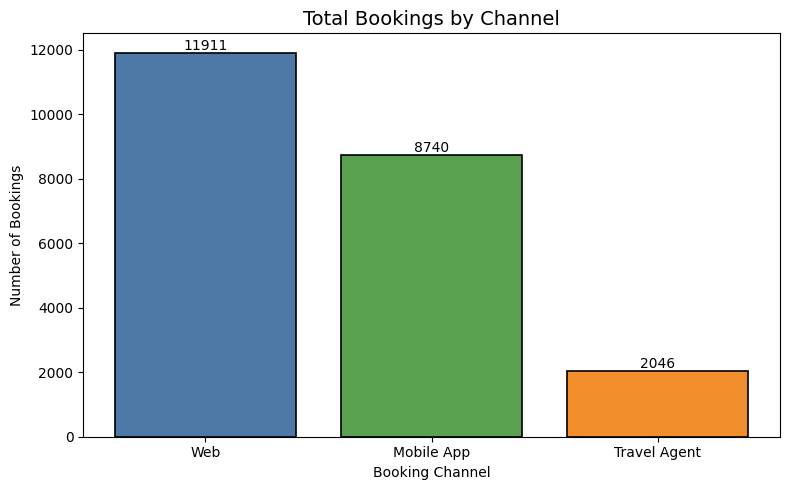

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(
    channel_booking_count['booking_channel'],
    channel_booking_count['total_bookings'],
    color=['#4E79A7', '#59A14F', '#F28E2B', '#E15759'],
    edgecolor='black',
    linewidth=1.2
)

plt.title('Total Bookings by Channel', fontsize=14)
plt.xlabel('Booking Channel')
plt.ylabel('Number of Bookings')

for index, value in enumerate(channel_booking_count['total_bookings']):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


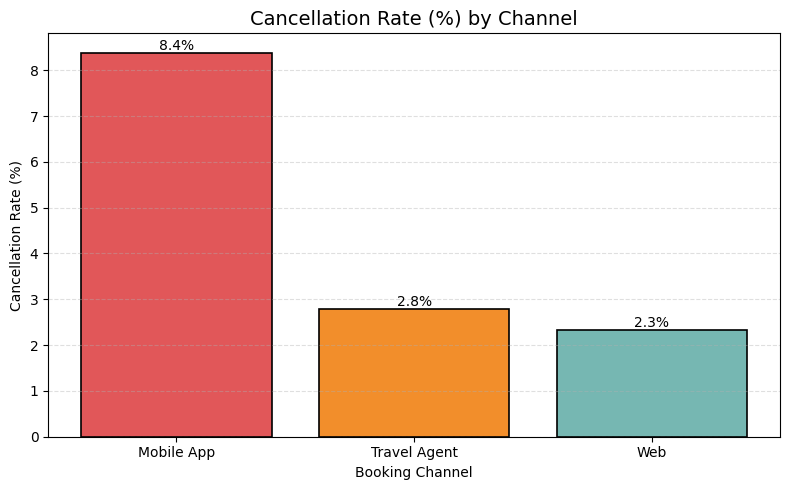

In [36]:
#Chart : Cancellation Rate by Channel
plt.figure(figsize=(8,5))

plt.bar(
    channel_cancellation['booking_channel'],
    channel_cancellation['cancellation_rate'],
    color=['#E15759', '#F28E2B', '#76B7B2', '#59A14F'],
    edgecolor='black',
    linewidth=1.2
)

plt.title('Cancellation Rate (%) by Channel', fontsize=14)
plt.xlabel('Booking Channel')
plt.ylabel('Cancellation Rate (%)')

for index, value in enumerate(channel_cancellation['cancellation_rate']):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


# **WHY cancellations happen.**

# Create Lead Time (in days)

In [37]:
#Create lead time bucket
df_analysis['lead_time_bucket'] = pd.cut(
    df_analysis['lead_time'],
    bins=[-1, 7, 30, 90, 365],
    labels=['0-7 days', '8-30 days', '31-90 days', '90+ days']
)


In [38]:
lead_cancel = (
    df_analysis
    .groupby('lead_time_bucket')['is_cancelled']
    .mean()
    .reset_index()
)

lead_cancel['is_cancelled'] *= 100
lead_cancel


/tmp/ipython-input-2085324022.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('lead_time_bucket')['is_cancelled']


,lead_time_bucket,is_cancelled
0,0-7 days,4.264871
1,8-30 days,4.819552
2,31-90 days,4.712460
3,90+ days,NaN


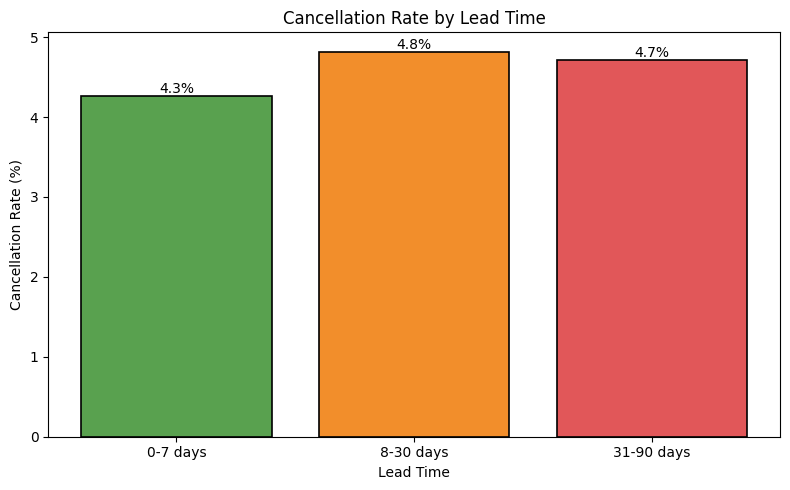

In [39]:
plt.figure(figsize=(8,5))

plt.bar(
    lead_cancel['lead_time_bucket'],
    lead_cancel['is_cancelled'],
    color=['#59A14F', '#F28E2B', '#E15759', '#B07AA1'],
    edgecolor='black',
    linewidth=1.2
)

plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate (%)')

for i, v in enumerate(lead_cancel['is_cancelled']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Cancellations are lowest for short lead-time bookings (0–7 days) and increase for medium to long lead-time bookings (8–30 and 31–90 days), indicating higher uncertainty and speculative behavior when customers book further in advance.

# Cancellation by Star Rating

In [40]:
star_cancel = (
    df_analysis
    .groupby('star_rating')['is_cancelled']
    .mean()
    .reset_index()
)

star_cancel['is_cancelled'] *= 100
star_cancel


,star_rating,is_cancelled
0,2,4.278783
1,3,5.080281
2,4,4.564452
3,5,4.456328


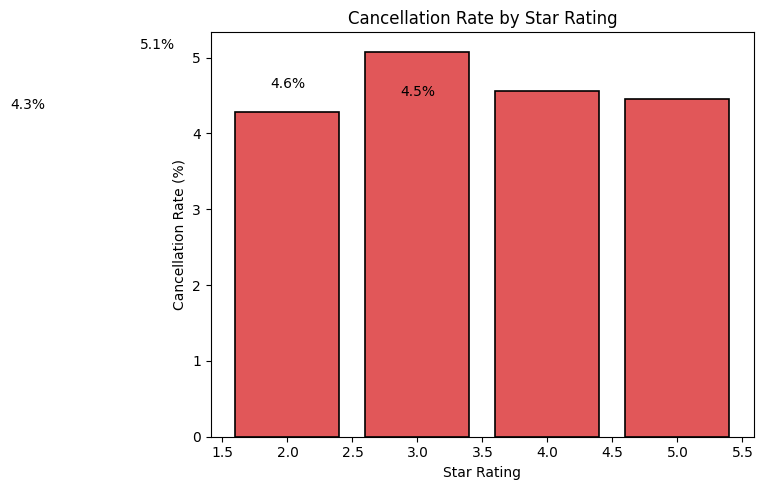

In [41]:
plt.figure(figsize=(8,5))

plt.bar(
    star_cancel['star_rating'],
    star_cancel['is_cancelled'],
    color='#E15759',
    edgecolor='black',
    linewidth=1.2
)

plt.title('Cancellation Rate by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Cancellation Rate (%)')

for i, v in enumerate(star_cancel['is_cancelled']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Cancellation rates vary moderately across star ratings, with mid-range (3★) properties experiencing the highest cancellation levels, while both budget and premium hotels show relatively lower and more stable cancellation behavior.

# Cancellation by Travel Month (Seasonality)

In [42]:
month_cancel = (
    df_analysis
    .groupby('travel_month')['is_cancelled']
    .mean()
    .reset_index()
)

month_cancel['is_cancelled'] *= 100
month_cancel


,travel_month,is_cancelled
0,1,9.411765
1,3,0.467290
2,4,3.344768
3,5,8.112041
4,6,1.467156
5,7,7.631347
6,8,3.805774
7,9,2.824268
8,10,5.512422
9,11,5.791506


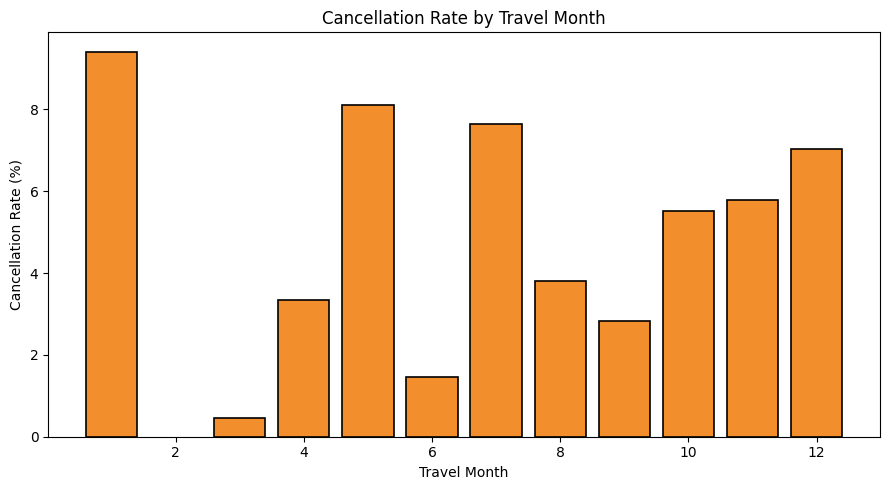

In [43]:
plt.figure(figsize=(9,5))

plt.bar(
    month_cancel['travel_month'],
    month_cancel['is_cancelled'],
    color='#F28E2B',
    edgecolor='black',
    linewidth=1.2
)

plt.title('Cancellation Rate by Travel Month')
plt.xlabel('Travel Month')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()


Cancellation rates peak during certain months, indicating seasonal uncertainty and demand volatility.

# Monthly Booking Volume (Travel Month)

In [44]:
monthly_bookings = (
    df_analysis
    .groupby('travel_month')
    .size()
    .reset_index(name='total_bookings')
)
monthly_bookings


,travel_month,total_bookings
0,1,255
1,3,856
2,4,2332
3,5,2749
4,6,2999
5,7,3407
6,8,3810
7,9,2868
8,10,1288
9,11,1036


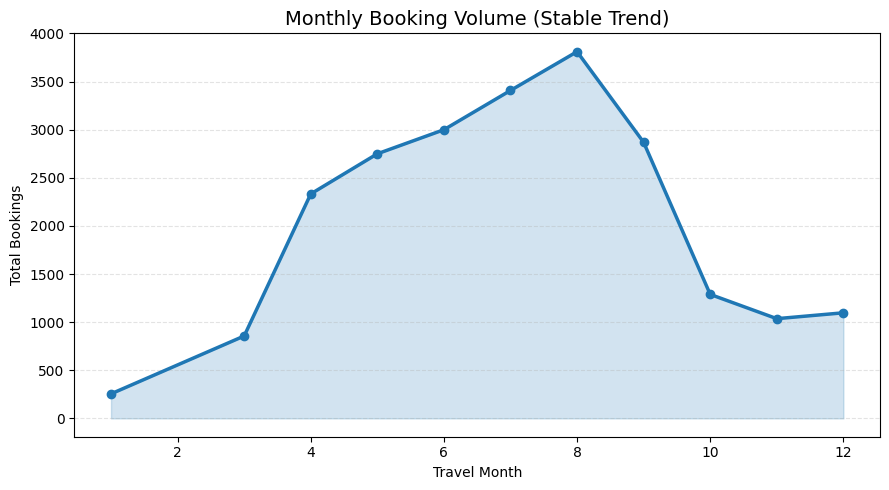

In [45]:
plt.figure(figsize=(9,5))

plt.plot(
    monthly_bookings['travel_month'],
    monthly_bookings['total_bookings'],
    marker='o',
    linewidth=2.5,
    color='#1f77b4'
)

plt.fill_between(
    monthly_bookings['travel_month'],
    monthly_bookings['total_bookings'],
    color='#1f77b4',
    alpha=0.2
)

plt.title('Monthly Booking Volume (Stable Trend)', fontsize=14)
plt.xlabel('Travel Month')
plt.ylabel('Total Bookings')

plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


Booking volume shows clear seasonal variation, with certain travel months attracting significantly higher demand, indicating strong seasonality in travel behavior.

# Monthly Revenue Trend

In [46]:
monthly_revenue = (
    df_analysis[df_analysis['is_cancelled'] == 0]
    .groupby('travel_month')['selling_price']
    .sum()
    .reset_index(name='total_revenue')
)
monthly_revenue


,travel_month,total_revenue
0,1,6.676822e+06
1,3,2.481060e+07
2,4,6.770451e+07
3,5,7.502347e+07
4,6,8.766855e+07
5,7,9.382120e+07
6,8,1.086937e+08
7,9,8.284254e+07
8,10,3.656884e+07
9,11,2.906010e+07


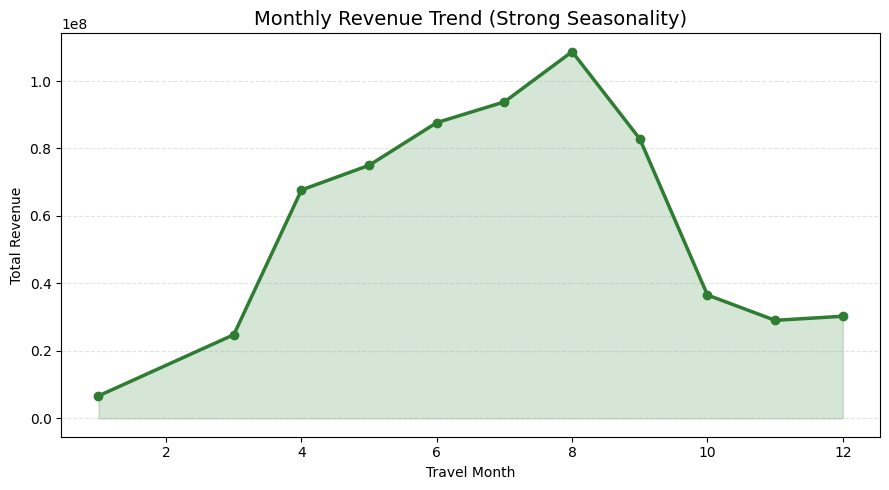

In [47]:
plt.figure(figsize=(9,5))

plt.plot(
    monthly_revenue['travel_month'],
    monthly_revenue['total_revenue'],
    marker='o',
    linewidth=2.5,
    color='#2E7D32'
)

plt.fill_between(
    monthly_revenue['travel_month'],
    monthly_revenue['total_revenue'],
    color='#2E7D32',
    alpha=0.2
)

plt.title('Monthly Revenue Trend (Strong Seasonality)', fontsize=14)
plt.xlabel('Travel Month')
plt.ylabel('Total Revenue')

plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


Monthly revenue shows strong seasonality, increasing steadily from early months and peaking around August, followed by a sharp decline in the post-peak period. This indicates that a large portion of annual revenue is concentrated within a few high-demand months.

# Average Length of Stay by Travel Month

In [48]:
monthly_stay = (
    df_analysis[df_analysis['is_cancelled'] == 0]
    .groupby('travel_month')['length_of_stay']
    .mean()
    .reset_index(name='avg_stay_length')
)
monthly_stay


,travel_month,avg_stay_length
0,1,3.948052
1,3,4.138498
2,4,3.991571
3,5,4.078385
4,6,3.952284
5,7,3.995869
6,8,3.972442
7,9,4.025117
8,10,4.100247
9,11,3.920082


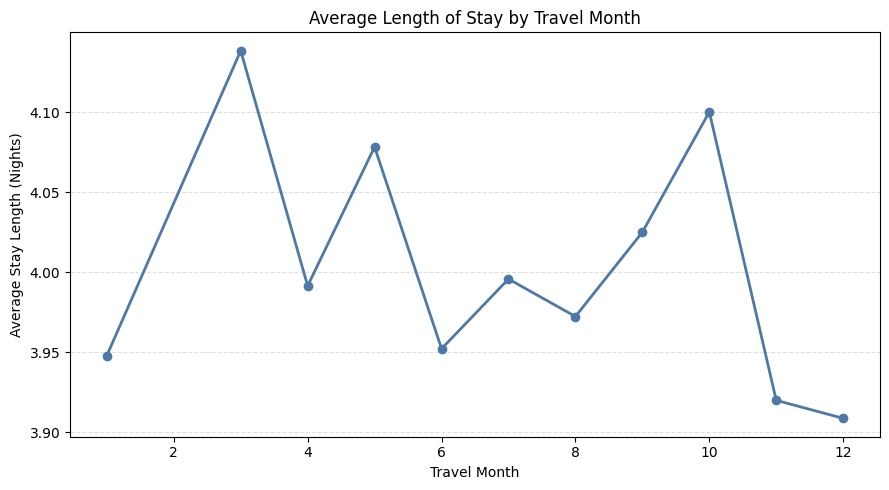

In [49]:
plt.figure(figsize=(9,5))

plt.plot(
    monthly_stay['travel_month'],
    monthly_stay['avg_stay_length'],
    marker='o',
    linewidth=2,
    color='#4E79A7'
)

plt.title('Average Length of Stay by Travel Month')
plt.xlabel('Travel Month')
plt.ylabel('Average Stay Length (Nights)')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Average stay length varies across travel months, with longer stays observed during holiday or peak seasons, indicating opportunities for bundled offers and premium pricing.

In [50]:

print("Total rows:", len(df_analysis))
print("Cancelled rows:", df_analysis['is_cancelled'].sum())

# Final cancellation rate
cancellation_rate = (
    df_analysis['is_cancelled'].sum() / len(df_analysis)
) * 100

print(f"Final cancellation rate: {cancellation_rate:.2f}%")


Total rows: 22697
Cancelled rows: 1067
Final cancellation rate: 4.70%


**Insight:**  
Approximately 4.7% of bookings are cancelled, highlighting a significant gap between booking demand and realized stays.


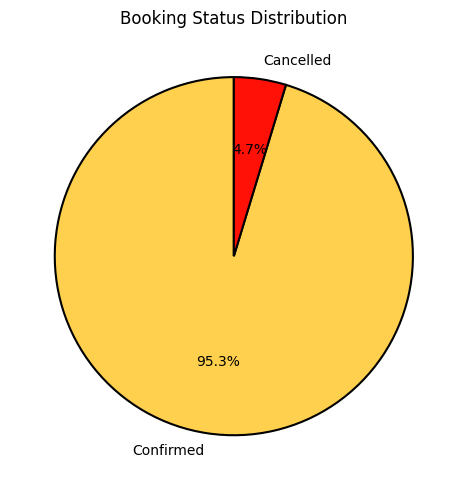

In [51]:
status_counts = (
    df_analysis['is_cancelled']
    .map({0:'Confirmed', 1:'Cancelled'})
    .value_counts()
)

plt.figure(figsize=(5,5))

plt.pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ffd04e', '#ff1107'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Booking Status Distribution')
plt.tight_layout()
plt.show()


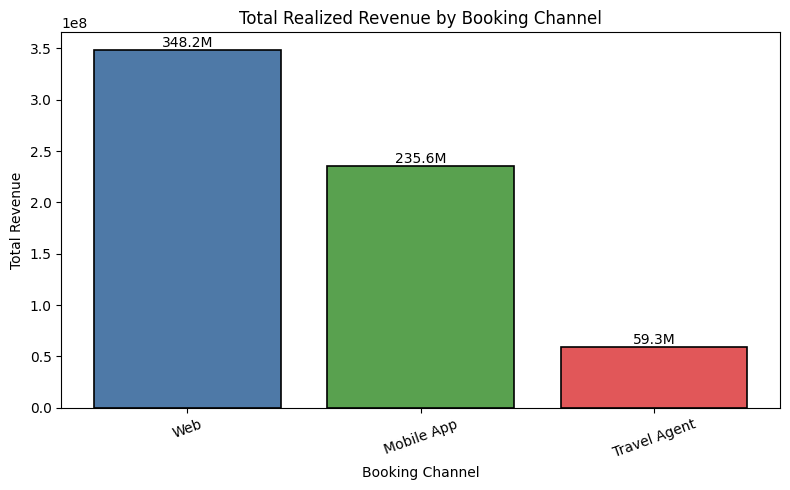

In [52]:
revenue_by_channel = (
    df_analysis[df_analysis['is_cancelled'] == 0]
    .groupby('booking_channel')['selling_price']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))

plt.bar(
    revenue_by_channel.index,
    revenue_by_channel.values,
    color=['#4E79A7', '#59A14F', '#E15759'],
    edgecolor='black',
    linewidth=1.2
)

plt.title('Total Realized Revenue by Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Total Revenue')

plt.xticks(rotation=20)

for i, v in enumerate(revenue_by_channel.values):
    plt.text(i, v, f'{v/1e6:.1f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Insight:**  
The Web channel contributes the highest share of realized revenue, indicating stronger booking quality and higher conversion efficiency compared to other channels. Travel Agent bookings generate comparatively lower realized revenue, suggesting higher leakage through cancellations or lower-value bookings.


# Stacked Bar Chart: Confirmed vs Cancelled by Channel

<Figure size 800x500 with 0 Axes>

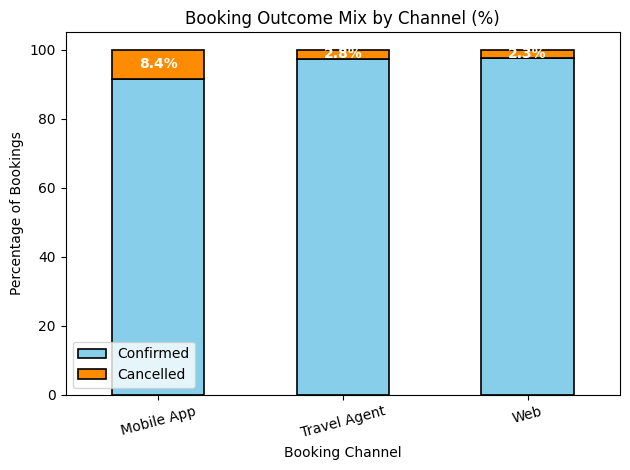

In [53]:
import matplotlib.pyplot as plt

#  Create counts
channel_counts = (
    df_analysis
    .groupby(['booking_channel', 'is_cancelled'])
    .size()
    .reset_index(name='count')
)

#  Convert to percentages per channel
channel_pct = (
    channel_counts
    .assign(
        pct=lambda x: x['count'] / x.groupby('booking_channel')['count'].transform('sum') * 100
    )
    .pivot(
        index='booking_channel',
        columns='is_cancelled',
        values='pct'
    )
)

#  Rename columns cleanly
channel_pct.columns = ['Confirmed', 'Cancelled']

plt.figure(figsize=(8,5))

channel_pct.plot(
    kind='bar',
    stacked=True,
    color=['#87CEEB', '#FF8C00'],
    edgecolor='black',
    linewidth=1.2
)

plt.title('Booking Outcome Mix by Channel (%)')
plt.xlabel('Booking Channel')
plt.ylabel('Percentage of Bookings')
plt.xticks(rotation=15)
# Removed the legend

#  Add cancelled % labels
for i, channel in enumerate(channel_pct.index):
    cancelled_pct = channel_pct.loc[channel, 'Cancelled']
    confirmed_pct = channel_pct.loc[channel, 'Confirmed']
    plt.text(
        i,
        confirmed_pct + cancelled_pct / 2,
        f"{cancelled_pct:.1f}%",
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Stay Length vs Booking Outcome

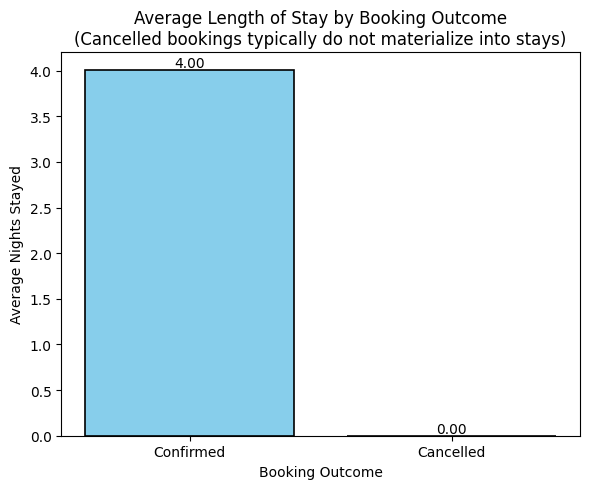

In [54]:
# Mean stay length by outcome
stay_means = (
    df_analysis
    .groupby('is_cancelled')['length_of_stay']
    .mean()
)

labels = ['Confirmed', 'Cancelled']
values = [stay_means[0], stay_means[1]]

plt.figure(figsize=(6,5))

bars = plt.bar(
    labels,
    values,
    color=['#87CEEB', '#FF8C00'],
    edgecolor='black',
    linewidth=1.2
)
plt.title(
    'Average Length of Stay by Booking Outcome\n(Cancelled bookings typically do not materialize into stays)',
    fontsize=12
)

plt.xlabel('Booking Outcome')
plt.ylabel('Average Nights Stayed')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()